In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from utils import *

def generate_synthetic_image(size=100, radius=20, center=(50, 50)):
    """
    Generate a synthetic binary image with a circle in the center.
    """
    image = np.zeros((size, size))
    rr, cc = np.ogrid[:size, :size]
    circle = (rr - center[0]) ** 2 + (cc - center[1]) ** 2 <= radius ** 2
    image[circle] = 1
    return image

def plot_snake(image, snake, title="Snake Evolution"):
    """
    Plot the snake on the image.
    """
    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap='gray')
    plt.plot(snake[:, 1], snake[:, 0], '-r', linewidth=2)
    plt.scatter(snake[:, 1], snake[:, 0], c='r', s=10)
    plt.title(title)
    plt.axis('off')
    plt.show()

def static_experiment(image, initial_snake_points, alpha, beta, gamma, iterations, w_edge, w_line=0.0, w_term=0.0, w_scale=0.0, sigma=2.0):
    """
    Perform the static experiment: evolve the snake on a single image.
    """
    # Initialize snake with fewer points
    snake = initialize_snake_contour(initial_snake_points, num_points=30)
    
    # Compute external energy (focus on edge energy)
    external_energy = compute_external_energy(image, w_line, w_edge, w_term, w_scale, sigma)
    
    # Precompute the inverse matrix for internal energy
    n_points = snake.shape[0]
    inv_P = create_internal_matrix(n_points, alpha, beta, gamma)
    
    # Visualize initial snake
    plot_snake(image, snake, title="Static Experiment - Initial Snake")
    
    # Evolve the snake
    for i in range(iterations):
        # Get external force
        external_force = get_external_force(external_energy, snake)

        # Evolve snake
        snake = evolve_snake(snake, inv_P, external_force, gamma)

        # Enforce boundary conditions
        snake[:, 0] = np.clip(snake[:, 0], 0, image.shape[0] - 1)
        snake[:, 1] = np.clip(snake[:, 1], 0, image.shape[1] - 1)

        # Visualize every 20 iterations
        if i % 20 == 0 or i == iterations - 1:
            plot_snake(image, snake, title=f"Static Experiment - Iteration {i}")

    return snake

def scale_space_experiment(complex_image, initial_snake_points, alpha, beta, gamma, iterations, w_edge, w_scale, sigma):
    """
    Perform the scale-space energy experiment: evolve the snake on a more complex image.
    """
    # Initialize snake with fewer points
    snake_complex = initialize_snake_contour(initial_snake_points, num_points=30)
    
    # Compute external energy with scale-space
    external_energy_complex = compute_external_energy(complex_image, w_line=0.0, w_edge=w_edge, w_term=0.0, w_scale=w_scale, sigma=sigma)
    
    # Precompute the inverse matrix for internal energy
    n_points_complex = snake_complex.shape[0]
    inv_P_complex = create_internal_matrix(n_points_complex, alpha, beta, gamma)
    
    # Visualize initial snake
    plot_snake(complex_image, snake_complex, title="Scale-Space Experiment - Initial Snake")
    
    # Evolve the snake
    for i in range(iterations):
        # Get external force
        external_force_complex = get_external_force(external_energy_complex, snake_complex)

        # Evolve snake
        snake_complex = evolve_snake(snake_complex, inv_P_complex, external_force_complex, gamma)

        # Enforce boundary conditions
        snake_complex[:, 0] = np.clip(snake_complex[:, 0], 0, complex_image.shape[0] - 1)
        snake_complex[:, 1] = np.clip(snake_complex[:, 1], 0, complex_image.shape[1] - 1)

        # Visualize every 50 iterations
        if i % 50 == 0 or i == iterations - 1:
            plot_snake(complex_image, snake_complex, title=f"Scale-Space Experiment - Iteration {i}")

    return snake_complex





Starting Static Experiment...


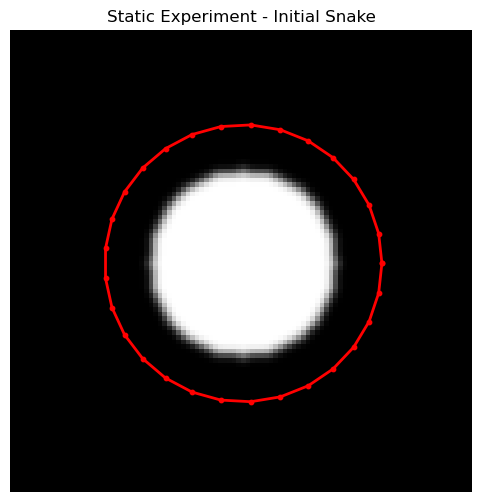

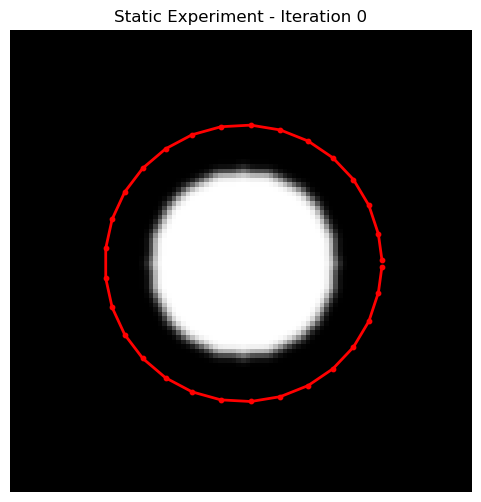

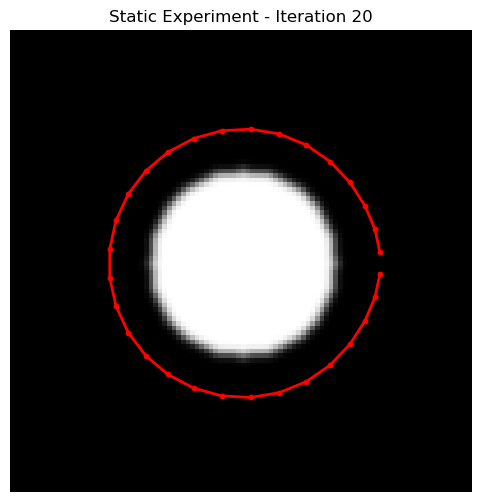

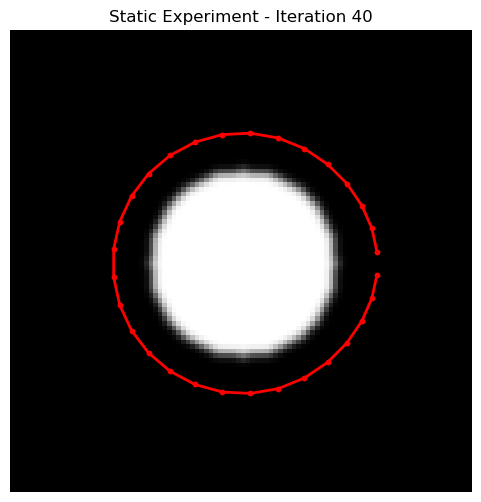

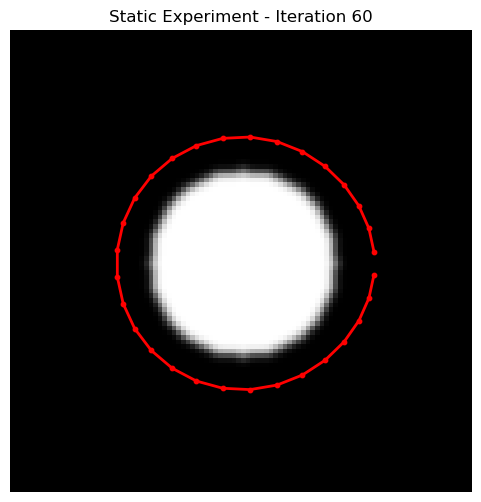

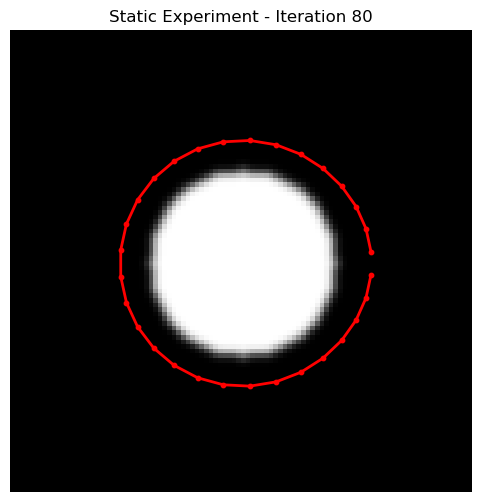

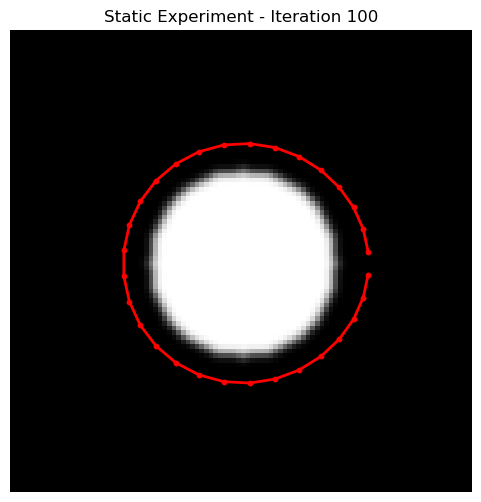

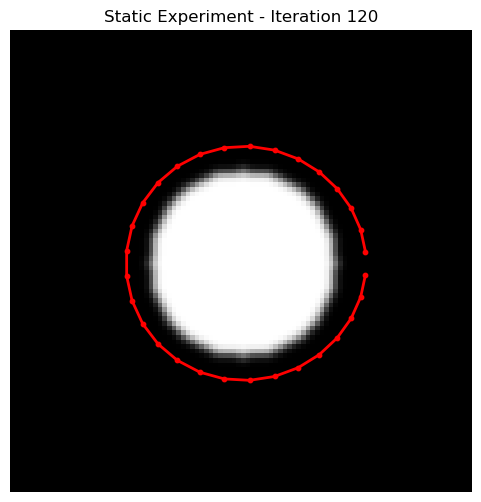

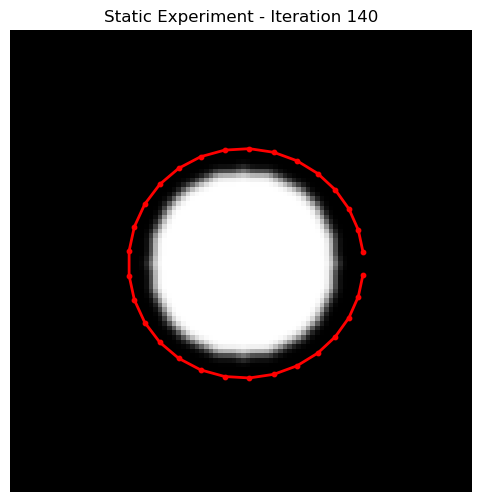

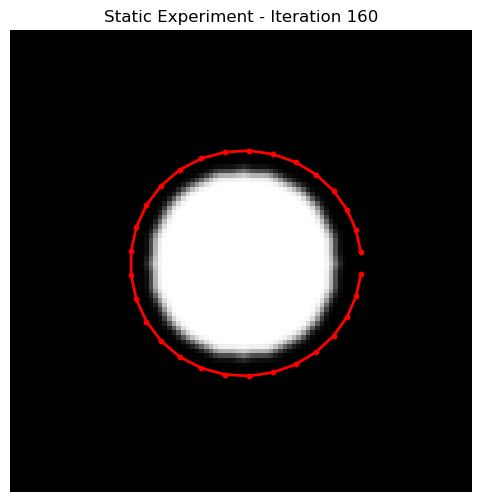

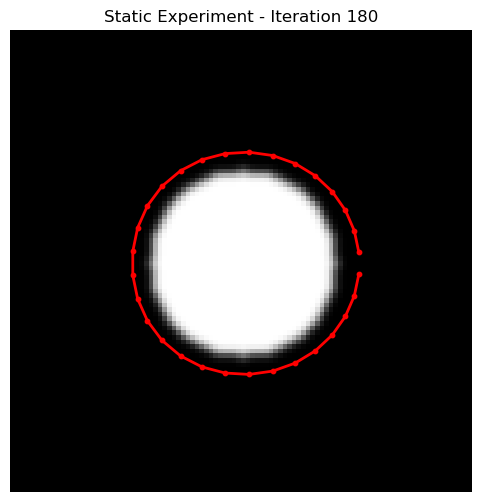

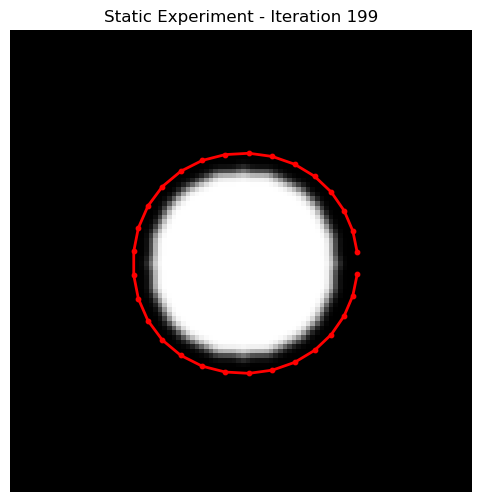

In [8]:

# Static Experiment
# ----------------------------
print("Starting Static Experiment...")
# Generate a synthetic image
image = generate_synthetic_image()

# Apply Gaussian smoothing
image = ndimage.gaussian_filter(image, sigma=1.0)

# Create an initial circular snake outside the object
t = np.linspace(0, 2 * np.pi, 30)
init_radius = 30  # Initialize outside the object (object radius=20)
x = 50 + init_radius * np.cos(t)
y = 50 + init_radius * np.sin(t)
initial_snake_points = np.array([y, x]).T

# Parameters
alpha = 0.3 # Elasticity parameter
beta = 0.5   # Rigidity parameter
gamma = .1 # Time step (smaller value for stability)
iterations = 200

# Weights for external energies
w_line = 0.0    # No attraction to intensity initially
w_edge = 1.0    # Focus on edges
w_term = 2.0    # No termination energy initially
w_scale = 1.0   # No scale-space energy initially
sigma = 4.0     # For scale-space energy

# Perform static experiment
static_snake = static_experiment(
    image=image,
    initial_snake_points=initial_snake_points,
    alpha=alpha,
    beta=beta,
    gamma=gamma,
    iterations=iterations,
    w_edge=w_edge,
    w_line=w_line,
    w_term=w_term,
    w_scale=w_scale,
    sigma=sigma
)



Starting Scale-Space Energy Experiment...


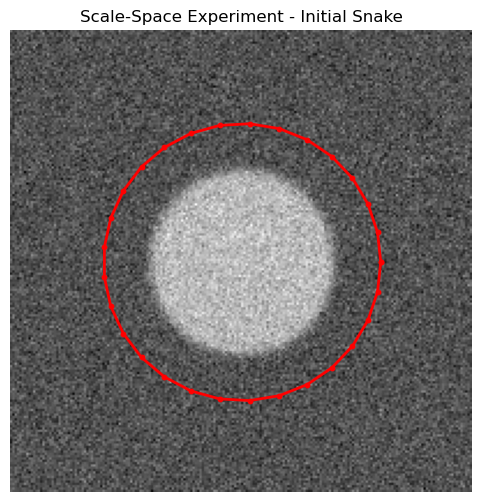

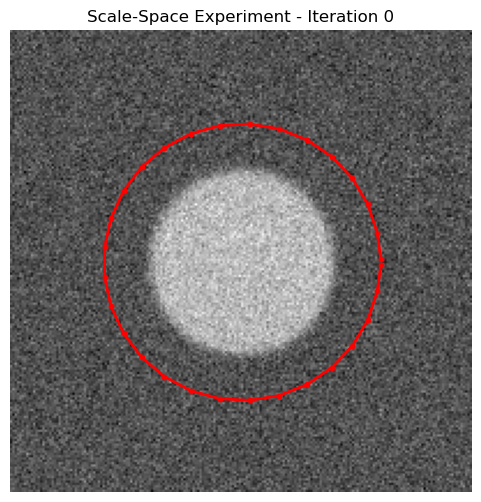

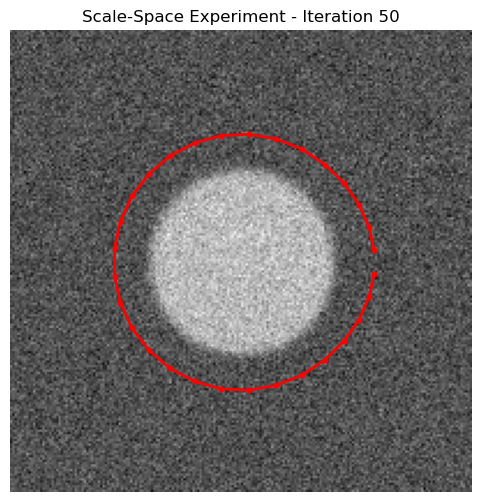

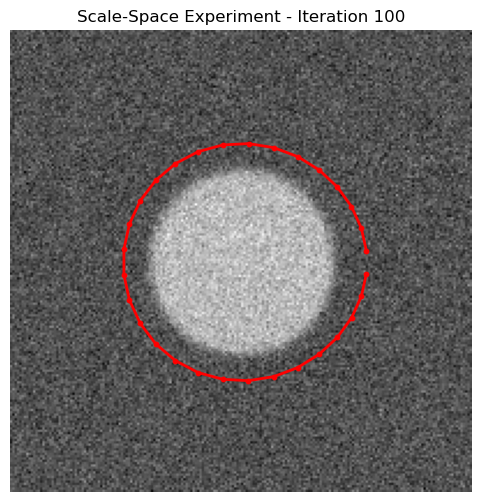

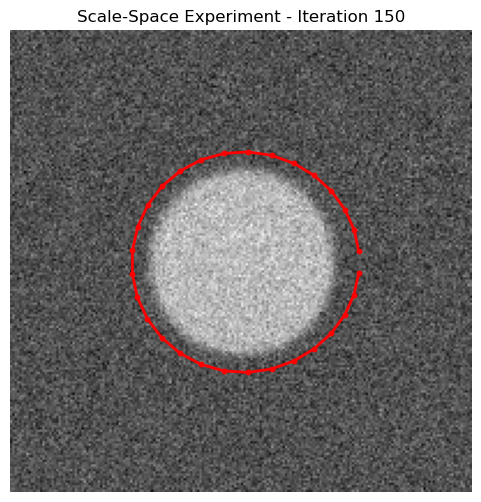

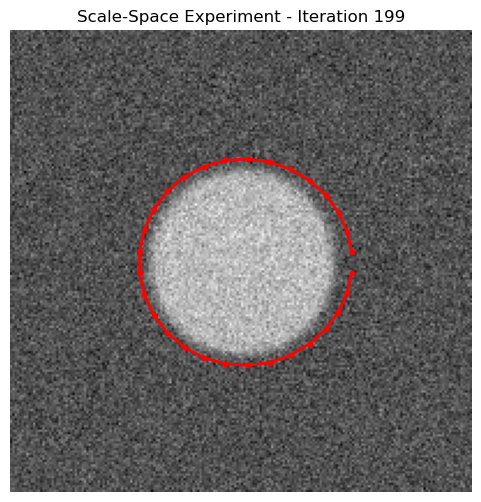

In [9]:
# ---------------------------
# Scale-Space Energy Experiment
# ----------------------------
print("Starting Scale-Space Energy Experiment...")
# Generate a new image with more complex features by increasing size and adding noise
complex_image = generate_synthetic_image(size=200, radius=40, center=(100, 100))
# Add Gaussian blur
complex_image = ndimage.gaussian_filter(complex_image, sigma=2.0)
# Add noise
complex_image += 0.2 * np.random.randn(*complex_image.shape)
# Normalize to [0,1]
complex_image = (complex_image - np.min(complex_image)) / (np.max(complex_image) - np.min(complex_image) + 1e-8)

# Create initial snake for complex image outside the object
t_complex = np.linspace(0, 2 * np.pi, 30)
init_radius_complex = 60  # Initialize outside the object (object radius=40)
x_complex = 100 + init_radius_complex * np.cos(t_complex)
y_complex = 100 + init_radius_complex * np.sin(t_complex)
initial_snake_points_complex = np.array([y_complex, x_complex]).T

# Parameters for scale-space experiment
w_line_complex = 0.0
w_edge_complex = 1.0
w_term_complex = 0.0
w_scale_complex = 1.0  # Introduce scale-space energy
sigma_complex = 3.0

# Perform scale-space energy experiment
scale_snake = scale_space_experiment(
    complex_image=complex_image,
    initial_snake_points=initial_snake_points_complex,
    alpha=alpha,
    beta=beta,
    gamma=gamma,
    iterations=iterations,
    w_edge=w_edge_complex,
    w_scale=w_scale_complex,
    sigma=sigma_complex
)
